In [3]:
import numpy as np
import pandas as pd

In [29]:
marks = pd.read_csv('https://query.data.world/s/HqjNNadqEnwSq1qnoV_JqyRJkc7o6O')
marks.head()

,Prefix,Assignment,Tutorial,Midterm,TakeHome,Final
0,5,57.14,34.09,64.38,51.48,52.50
1,8,95.05,105.49,67.50,99.07,68.33
2,8,83.70,83.17,30.00,63.15,48.89
3,7,81.22,96.06,49.38,105.93,80.56
4,8,91.32,93.64,95.00,107.41,73.89


In [30]:
# marks['Prefix'].isna().sum()
# marks['Assignment'].isna().sum()
# marks['Tutorial'].isna().sum()

marks.isnull().sum()

Prefix         0
Assignment     2
Tutorial      12
Midterm       16
TakeHome       9
Final          5
dtype: int64

In [31]:
marks.shape

(99, 6)

In [32]:
marks[marks.isnull().sum(axis=1) < 5].shape

(97, 6)

In [34]:
marks = marks[marks.isnull().sum(axis=1) < 5]
marks.isnull().sum()


Prefix         0
Assignment     0
Tutorial      10
Midterm       14
TakeHome       7
Final          3
dtype: int64

In [37]:
df = pd.DataFrame(np.random.randn(5, 3), index=['a', 'c', 'e', 'f', 'h'], columns=['one', 'two', 'three'])
df

,one,two,three
a,-0.134367,1.264729,0.045989
c,0.786844,-0.844002,0.026434
e,-0.856645,-1.715581,1.960055
f,0.123761,-0.666330,-1.255039
h,0.636371,-1.311063,0.798169


In [38]:
df['four'] = 'bar'
df['five'] = df['one'] > 0
df

,one,two,three,four,five
a,-0.134367,1.264729,0.045989,bar,False
c,0.786844,-0.844002,0.026434,bar,True
e,-0.856645,-1.715581,1.960055,bar,False
f,0.123761,-0.666330,-1.255039,bar,True
h,0.636371,-1.311063,0.798169,bar,True


In [39]:
df2 = df.reindex(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])
df2

,one,two,three,four,five
a,-0.134367,1.264729,0.045989,bar,False
b,NaN,NaN,NaN,NaN,NaN
c,0.786844,-0.844002,0.026434,bar,True
d,NaN,NaN,NaN,NaN,NaN
e,-0.856645,-1.715581,1.960055,bar,False
f,0.123761,-0.666330,-1.255039,bar,True
g,NaN,NaN,NaN,NaN,NaN
h,0.636371,-1.311063,0.798169,bar,True


In [40]:
df2.isnull()

,one,two,three,four,five
a,False,False,False,False,False
b,True,True,True,True,True
c,False,False,False,False,False
d,True,True,True,True,True
e,False,False,False,False,False
f,False,False,False,False,False
g,True,True,True,True,True
h,False,False,False,False,False


In [41]:
df2.isna().sum()

one      3
two      3
three    3
four     3
five     3
dtype: int64

In [42]:
df2.notna().sum()

one      5
two      5
three    5
four     5
five     5
dtype: int64

In [43]:
df2.notna()

,one,two,three,four,five
a,True,True,True,True,True
b,False,False,False,False,False
c,True,True,True,True,True
d,False,False,False,False,False
e,True,True,True,True,True
f,True,True,True,True,True
g,False,False,False,False,False
h,True,True,True,True,True


In [44]:
df2 = df.copy()
df2['TimeStamp'] = pd.Timestamp('20120101')
df2

,one,two,three,four,five,TimeStamp
a,-0.134367,1.264729,0.045989,bar,False,2012-01-01
c,0.786844,-0.844002,0.026434,bar,True,2012-01-01
e,-0.856645,-1.715581,1.960055,bar,False,2012-01-01
f,0.123761,-0.666330,-1.255039,bar,True,2012-01-01
h,0.636371,-1.311063,0.798169,bar,True,2012-01-01


In [47]:
df2.loc[['a', 'c', 'h'], ['one', 'TimeStamp']] = np.nan
df2.get_dtype_counts()

float64           3
object            1
bool              1
datetime64[ns]    1
dtype: int64

In [51]:
df.mean(1)

a    0.294088
c    0.242319
e   -0.153043
f   -0.199402
h    0.280869
dtype: float64

In [52]:
df.cumsum()

,one,two,three,four,five
a,-0.134367,1.26473,0.0459894,bar,False
c,0.652476,0.420727,0.0724235,barbar,1
e,-0.204168,-1.29485,2.03248,barbarbar,1
f,-0.0804075,-1.96118,0.77744,barbarbarbar,2
h,0.555964,-3.27225,1.57561,barbarbarbarbar,3


In [55]:
df.cumsum(skipna=True)

,one,two,three,four,five
a,-0.134367,1.26473,0.0459894,bar,False
c,0.652476,0.420727,0.0724235,barbar,1
e,-0.204168,-1.29485,2.03248,barbarbar,1
f,-0.0804075,-1.96118,0.77744,barbarbarbar,2
h,0.555964,-3.27225,1.57561,barbarbarbarbar,3


In [59]:
# exlcude null values
df2.groupby('one').mean()

,two,three,five
one,,,
-0.856645,-1.715581,1.960055,False
0.123761,-0.666330,-1.255039,True


In [61]:
df2.fillna(0)

,one,two,three,four,five,TimeStamp
a,0.000000,1.264729,0.045989,bar,False,0
c,0.000000,-0.844002,0.026434,bar,True,0
e,-0.856645,-1.715581,1.960055,bar,False,2012-01-01 00:00:00
f,0.123761,-0.666330,-1.255039,bar,True,2012-01-01 00:00:00
h,0.000000,-1.311063,0.798169,bar,True,0


In [63]:
df2['one'].fillna(0)

a    0.000000
c    0.000000
e   -0.856645
f    0.123761
h    0.000000
Name: one, dtype: float64

In [66]:
df2.fillna(method='pad')

,one,two,three,four,five,TimeStamp
a,NaN,1.264729,0.045989,bar,False,NaT
c,NaN,-0.844002,0.026434,bar,True,NaT
e,-0.856645,-1.715581,1.960055,bar,False,2012-01-01
f,0.123761,-0.666330,-1.255039,bar,True,2012-01-01
h,0.123761,-1.311063,0.798169,bar,True,2012-01-01


In [68]:
df2.fillna(method='bfill')

,one,two,three,four,five,TimeStamp
a,-0.856645,1.264729,0.045989,bar,False,2012-01-01
c,-0.856645,-0.844002,0.026434,bar,True,2012-01-01
e,-0.856645,-1.715581,1.960055,bar,False,2012-01-01
f,0.123761,-0.666330,-1.255039,bar,True,2012-01-01
h,NaN,-1.311063,0.798169,bar,True,NaT


In [69]:
df2.fillna(method='bfill', limit=1)

,one,two,three,four,five,TimeStamp
a,NaN,1.264729,0.045989,bar,False,NaT
c,-0.856645,-0.844002,0.026434,bar,True,2012-01-01
e,-0.856645,-1.715581,1.960055,bar,False,2012-01-01
f,0.123761,-0.666330,-1.255039,bar,True,2012-01-01
h,NaN,-1.311063,0.798169,bar,True,NaT


In [81]:
dff = pd.DataFrame(np.random.randn(10, 3), columns=list('ABC'))
dff.iloc[3:5, 0] = np.nan
dff.iloc[4:6, 1] = np.nan
dff.iloc[5:8, 2] = np.nan
dff

,A,B,C
0,-1.203201,0.965398,1.634253
1,0.949839,-0.218438,0.021850
2,0.605391,-1.566725,0.192081
3,NaN,-0.941631,0.787399
4,NaN,NaN,-0.435192
5,-0.052863,NaN,NaN
6,0.106855,-1.008614,NaN
7,-0.924373,-0.730794,NaN
8,0.684897,-0.139992,0.376231
9,2.292469,-0.503763,-0.631782


In [82]:
# ===> filling value with mean 
dff.fillna(dff.mean())

,A,B,C
0,-1.203201,0.965398,1.634253
1,0.949839,-0.218438,0.021850
2,0.605391,-1.566725,0.192081
3,0.307377,-0.941631,0.787399
4,0.307377,-0.518070,-0.435192
5,-0.052863,-0.518070,0.277834
6,0.106855,-1.008614,0.277834
7,-0.924373,-0.730794,0.277834
8,0.684897,-0.139992,0.376231
9,2.292469,-0.503763,-0.631782


In [86]:
dff.fillna(dff.mean()['B':'C'])

,A,B,C
0,-1.203201,0.965398,1.634253
1,0.949839,-0.218438,0.021850
2,0.605391,-1.566725,0.192081
3,NaN,-0.941631,0.787399
4,NaN,-0.518070,-0.435192
5,-0.052863,-0.518070,0.277834
6,0.106855,-1.008614,0.277834
7,-0.924373,-0.730794,0.277834
8,0.684897,-0.139992,0.376231
9,2.292469,-0.503763,-0.631782


In [87]:
# ===> dropping NA values
dff.dropna()

,A,B,C
0,-1.203201,0.965398,1.634253
1,0.949839,-0.218438,0.021850
2,0.605391,-1.566725,0.192081
8,0.684897,-0.139992,0.376231
9,2.292469,-0.503763,-0.631782


In [98]:
d = {'a': list(range(4)), 'b': list('ab..'), 'c': ['a', 'b', np.nan, 'd']}
df = pd.DataFrame(d)
df

,a,b,c
0,0,a,a
1,1,b,b
2,2,.,NaN
3,3,.,d


In [100]:
df.replace(".", np.nan)


,a,b,c
0,0,a,a
1,1,b,b
2,2,NaN,NaN
3,3,NaN,d


In [117]:
df.replace(['.', 'a'], ['b', np.nan])# == df

,a,b,c
0,0,NaN,NaN
1,1,b,b
2,2,b,NaN
3,3,b,d


In [124]:
customer = pd.read_csv('https://query.data.world/s/y9rxL9mGdP6AXPiDaIL4yYm6DsfTV2')
customer.head()

,Customer_Name,Province,Region,Customer_Segment,Cust_id
0,MUHAMMED MACINTYRE,NUNAVUT,NUNAVUT,SMALL BUSINESS,Cust_1
1,BARRY FRENCH,NUNAVUT,NUNAVUT,CONSUMER,Cust_2
2,CLAY ROZENDAL,NUNAVUT,NUNAVUT,CORPORATE,Cust_3
3,CARLOS SOLTERO,NUNAVUT,NUNAVUT,CONSUMER,Cust_4
4,CARL JACKSON,NUNAVUT,NUNAVUT,CORPORATE,Cust_5


In [129]:
customer['Cust_id'].replace('Cust_', '', regex=True, inplace=True)
customer.head()

,Customer_Name,Province,Region,Customer_Segment,Cust_id
0,MUHAMMED MACINTYRE,NUNAVUT,NUNAVUT,SMALL BUSINESS,1
1,BARRY FRENCH,NUNAVUT,NUNAVUT,CONSUMER,2
2,CLAY ROZENDAL,NUNAVUT,NUNAVUT,CORPORATE,3
3,CARLOS SOLTERO,NUNAVUT,NUNAVUT,CONSUMER,4
4,CARL JACKSON,NUNAVUT,NUNAVUT,CORPORATE,5


### Removing outliers:

In [133]:
arr = [10, 386, 479, 627, 20, 523, 482, 483, 542, 699, 535, 617, 577, 471, 615, 583, 441, 562, 563, 527, 453, 530, 433, 541, 585, 704, 443, 569, 430, 637, 331, 511, 552, 496, 484, 566, 554, 472, 335, 440, 579, 341, 545, 615, 548, 604, 439, 556, 442, 461, 624, 611, 444, 578, 405, 487, 490, 496, 398, 512, 422, 455, 449, 432, 607, 679, 434, 597, 639, 565, 415, 486, 668, 414, 665, 763, 557, 304, 404, 454, 689, 610, 483, 441, 657, 590, 492, 476, 437, 483, 529, 363, 711, 543]

elements = np.array(arr)
elements


array([ 10, 386, 479, 627,  20, 523, 482, 483, 542, 699, 535, 617, 577,
       471, 615, 583, 441, 562, 563, 527, 453, 530, 433, 541, 585, 704,
       443, 569, 430, 637, 331, 511, 552, 496, 484, 566, 554, 472, 335,
       440, 579, 341, 545, 615, 548, 604, 439, 556, 442, 461, 624, 611,
       444, 578, 405, 487, 490, 496, 398, 512, 422, 455, 449, 432, 607,
       679, 434, 597, 639, 565, 415, 486, 668, 414, 665, 763, 557, 304,
       404, 454, 689, 610, 483, 441, 657, 590, 492, 476, 437, 483, 529,
       363, 711, 543])

In [149]:
mean = elements.mean()
std_dev = elements.std()
std_dev

# ==> remove outliers with mean +/- std_dev
final_elements = [x for x in arr if (x > mean - 2 * std_dev)]
final_elements = [x for x in final_elements if (x < mean + 2 * std_dev)]
len(final_elements)

91

In [20]:
rating = pd.read_csv('https://query.data.world/s/EX0EpmqwfA2UYGz1Xtd_zi4R0dQpog')
rating.head()

,userID,placeID,rating,food_rating,service_rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2
3,U1077,135060,1,2,2
4,U1068,135104,1,1,2


In [22]:
rating.shape

(1254, 5)

In [27]:
t = rating.drop_duplicates()
rating.shape

(1254, 5)

### Univariate ordered analysis

In [4]:
centuries = pd.read_csv('https://raw.githubusercontent.com/murali0861/upgrad_ml_ai/master/Data%20cleaning/tendulkar_ODI.csv')
centuries.head()

,Unnamed: 0,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,1,0,-,2,0,0,0,5,caught,2,v Pakistan,Gujranwala,18-Dec-89
1,2,0,2,2,0,0,0,5,caught,2,v New Zealand,Dunedin,1-Mar-90
2,3,36,51,39,5,0,92.3,6,caught,1,v New Zealand,Wellington,6-Mar-90
3,4,19,38,35,1,1,54.28,4,bowled,2,v England,Leeds,18-Jul-90
4,5,31,31,26,3,0,119.23,6,bowled,2,v England,Nottingham,20-Jul-90


In [5]:
# centuries.replace('*', '', regex=True, inplace=True)
centuries = centuries[ (centuries['Runs'] != 'DNB') & (centuries['Runs'] != 'TDNB') ]
centuries['Runs'].replace(['\*'], '', regex=True, inplace=True)
centuries['Runs'].astype(float)
centuries['Runs'].head()

0     0
1     0
2    36
3    19
4    31
Name: Runs, dtype: object

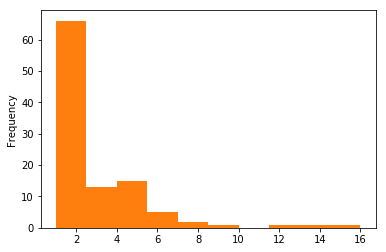

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

centuries['Runs'].value_counts().plot(kind='hist', bins=10, alpha=0.5)
plt.hist(centuries['Runs'].value_counts(), bins=10)
plt.show()


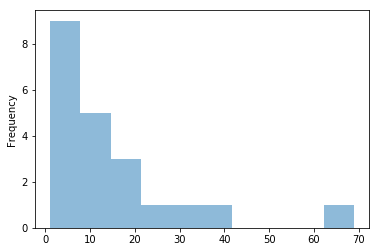

In [39]:
centuries['4s'].value_counts().plot(kind='hist', bins=10, alpha=0.5)

In [42]:
popularity = pd.read_csv('https://raw.githubusercontent.com/murali0861/upgrad_ml_ai/master/Data%20cleaning/popularity.csv')
popularity.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


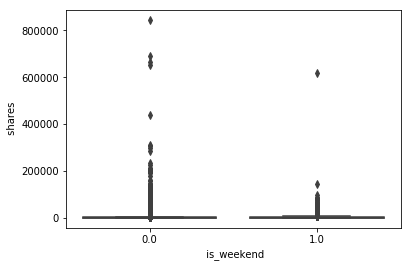

In [74]:
# plt.figimage
import seaborn as sns

weekend_shares = popularity[ (popularity[' is_weekend'] == 1.0)]
weekend_shares = weekend_shares[ weekend_shares[' shares'] < 40000 ]

# popularity.boxplot(column=' shares')

# plt.figure(figsize=(20,10)) 

# plt.boxplot(colu popularity[' shares'], =' is_weekend')


# popularity.boxplot(column=[' shares'], by=' is_weekend')

sns.boxplot(y=popularity[' shares'], x=popularity[' is_weekend'])
plt.show()

# popularity.groupby(' shares').count()

In [81]:
first_quantile = popularity[' shares'].quantile(0.25)
third_quantile = popularity[' shares'].quantile(0.75)


In [82]:
weekend_shares_outliers = popularity[ (popularity[' shares'] >= first_quantile) & (popularity[' shares'] <= third_quantile)  ]

weekend_shares_outliers.shape

(20111, 61)

<function matplotlib.pyplot.show(*args, **kw)>

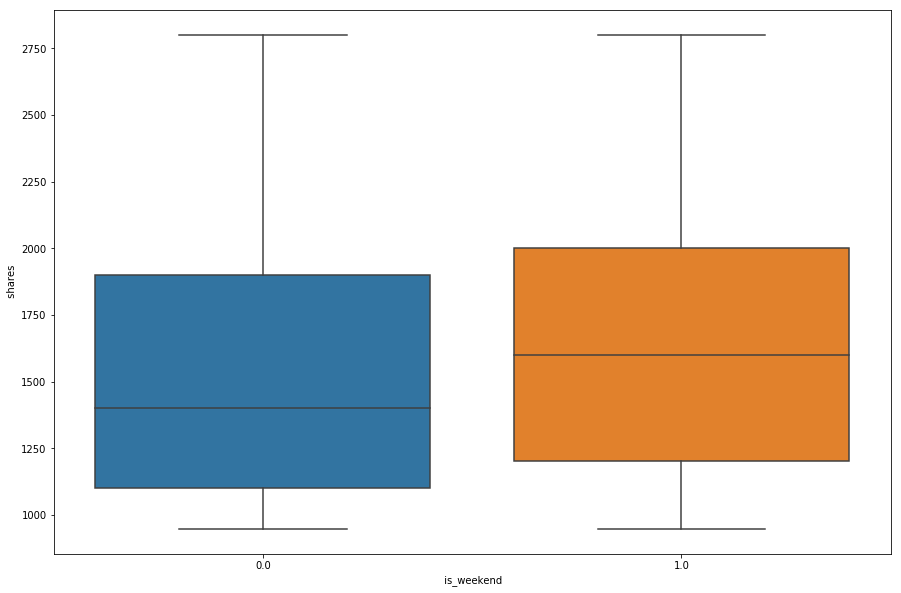

In [87]:
plt.figure(figsize=(15,10)) 
sns.boxplot(y=weekend_shares_outliers[' shares'], x=weekend_shares_outliers[' is_weekend'])
plt.show

###  Shares vs weekend

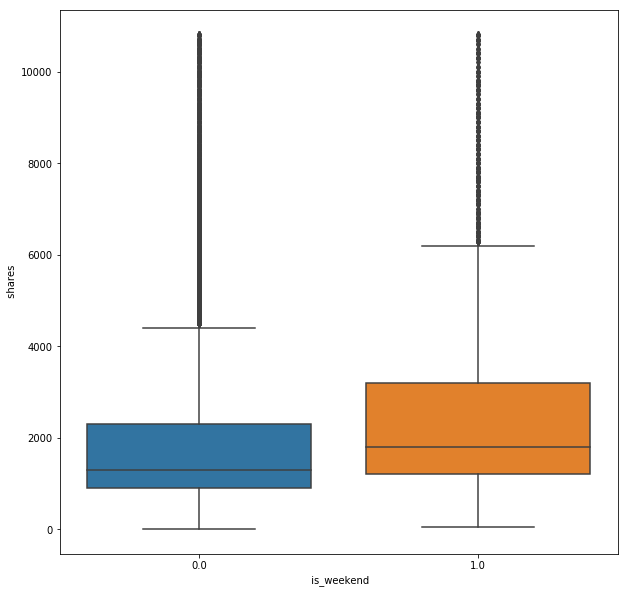

In [92]:
ninty_five = popularity[' shares'].quantile(0.95)
outliers_per = popularity[ (popularity[' shares'] <= ninty_five) ]
plt.figure(figsize=(10, 10))
sns.boxplot(x=outliers_per[' is_weekend'], y=outliers_per[' shares'])
plt.show()

###  Shares vs weekday

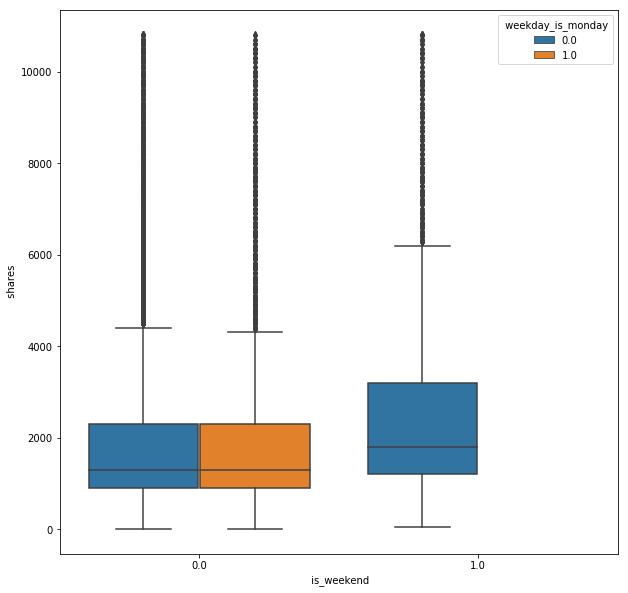

In [105]:
ninty_five = popularity[' shares'].quantile(0.95)
outliers_per = popularity[ (popularity[' shares'] <= ninty_five) ]
plt.figure(figsize=(10, 10))
sns.boxplot(x=outliers_per[' is_weekend'], y=outliers_per[' shares'], hue=outliers_per[' weekday_is_monday'])
plt.show()
# outliers_per.columns


In [110]:
popularity[' num_keywords'].mode()

0    7.0
dtype: float64

In [113]:
popularity[' shares'].mean()

3395.3801836343455

In [116]:
popularity[' shares'].describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name:  shares, dtype: float64

In [118]:
popularity[' shares'].median()

1400.0

In [139]:
seventy_quantile = popularity[' shares'].quantile(0.78)
popularity[' shares'].describe(percentiles= [0.78])
# seventy_quantile

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
50%        1400.000000
78%        3100.000000
max      843300.000000
Name:  shares, dtype: float64

In [135]:
popularity[ popularity[' shares'] <= seventy_quantile ]

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.700000,-0.350000,-0.600000,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.700000,-0.118750,-0.125000,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.000000,-0.466667,-0.800000,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.800000,-0.369697,-0.600000,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.000000,-0.220192,-0.500000,-0.050000,0.454545,0.136364,0.045455,0.136364,505
5,http://mashable.com/2013/01/07/beewi-smart-toys/,731.0,10.0,370.0,0.559889,1.0,0.698198,2.0,2.0,0.0,...,0.136364,0.600000,-0.195000,-0.400000,-0.100000,0.642857,0.214286,0.142857,0.214286,855
6,http://mashable.com/2013/01/07/bodymedia-armba...,731.0,8.0,960.0,0.418163,1.0,0.549834,21.0,20.0,20.0,...,0.100000,1.000000,-0.224479,-0.500000,-0.050000,0.000000,0.000000,0.500000,0.000000,556
7,http://mashable.com/2013/01/07/canon-poweshot-n/,731.0,12.0,989.0,0.433574,1.0,0.572108,20.0,20.0,20.0,...,0.100000,1.000000,-0.242778,-0.500000,-0.050000,1.000000,0.500000,0.500000,0.500000,891
9,http://mashable.com/2013/01/07/chuck-hagel-web...,731.0,10.0,231.0,0.636364,1.0,0.797101,4.0,1.0,1.0,...,0.100000,0.500000,-0.238095,-0.500000,-0.100000,0.000000,0.000000,0.500000,0.000000,710
10,http://mashable.com/2013/01/07/cosmic-events-d...,731.0,9.0,1248.0,0.490050,1.0,0.731638,11.0,0.0,1.0,...,0.100000,1.000000,-0.415064,-1.000000,-0.100000,0.000000,0.000000,0.500000,0.000000,2200


In [131]:
popularity[' shares'].describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name:  shares, dtype: float64

In [145]:
ninty_five = popularity[' shares'].quantile(0.95)
ninty_file_popularity = popularity[ popularity[' shares'] <= ninty_five ]
ninty_file_popularity[' shares'].describe()

count    37663.000000
mean      2074.334387
std       1871.814139
min          1.000000
25%        927.000000
50%       1400.000000
75%       2400.000000
max      10800.000000
Name:  shares, dtype: float64

In [147]:
popularity.size

2418284

In [150]:
ninty_file_popularity.size / popularity.size

0.950030269397639

In [152]:
(popularity[ popularity[' shares'] > ninty_five ].size) / (popularity.size)

0.04996973060236101

###  Segmentation Univariate

In [153]:
students = pd.read_csv('https://cdn.upgrad.com/UpGrad/temp/547dea8e-f823-421c-b1a7-765554424b57/EDA_nas.csv')
students.head()

,STUID,State,District,Gender,Age,Category,Same.language,Siblings,Handicap,Father.edu,...,Express.science.views,Watch.TV,Read.magazine,Read.a.book,Play.games,Help.in.household,Maths..,Reading..,Science..,Social..
0,26011001001,Maharashtra,1,Girl,13 years,3.0,2.0,1 sibling,No,Illiterate,...,Agree,Every day,Never,Once a month,Once a week,Every day,NaN,33.33,NaN,NaN
1,26011001002,Maharashtra,1,Girl,15 years,3.0,2.0,3 siblings,No,NaN,...,Agree,Once a week,Never,Never,Once a week,Every day,NaN,62.07,NaN,NaN
2,26011001003,Maharashtra,1,Girl,14 years,3.0,2.0,3 siblings,No,Degree & above,...,Agree,Every day,Once a month,Once a month,Once a week,Every day,NaN,41.38,NaN,NaN
3,26011001004,Maharashtra,1,Boy,13 years,3.0,2.0,3 siblings,No,Secondary,...,Agree,Every day,Every day,Never,Every day,Every day,29.82,NaN,NaN,NaN
4,26011001005,Maharashtra,1,Girl,14 years,3.0,2.0,2 siblings,No,Primary,...,Neither,Never,Never,Once a month,Once a week,Every day,NaN,NaN,27.27,NaN
